Epoch 1/300, Loss: 0.6904, Accuracy: 0.4885
Epoch 2/300, Loss: 0.6896, Accuracy: 0.5008
Epoch 3/300, Loss: 0.6901, Accuracy: 0.5117
Epoch 4/300, Loss: 0.6882, Accuracy: 0.5156
Epoch 5/300, Loss: 0.6891, Accuracy: 0.5176
Epoch 6/300, Loss: 0.6889, Accuracy: 0.5173
Epoch 7/300, Loss: 0.6887, Accuracy: 0.5160
Epoch 8/300, Loss: 0.6884, Accuracy: 0.5185
Epoch 9/300, Loss: 0.6865, Accuracy: 0.5228
Epoch 10/300, Loss: 0.6873, Accuracy: 0.5183
Epoch 11/300, Loss: 0.6848, Accuracy: 0.5171
Epoch 12/300, Loss: 0.6866, Accuracy: 0.5147
Epoch 13/300, Loss: 0.6843, Accuracy: 0.5159
Epoch 14/300, Loss: 0.6837, Accuracy: 0.5207
Epoch 15/300, Loss: 0.6858, Accuracy: 0.5172
Epoch 16/300, Loss: 0.6837, Accuracy: 0.5153
Epoch 17/300, Loss: 0.6822, Accuracy: 0.5125
Epoch 18/300, Loss: 0.6830, Accuracy: 0.5109
Epoch 19/300, Loss: 0.6827, Accuracy: 0.5246
Epoch 20/300, Loss: 0.6815, Accuracy: 0.5184
Epoch 21/300, Loss: 0.6839, Accuracy: 0.5147
Epoch 22/300, Loss: 0.6809, Accuracy: 0.5127
Epoch 23/300, Loss:

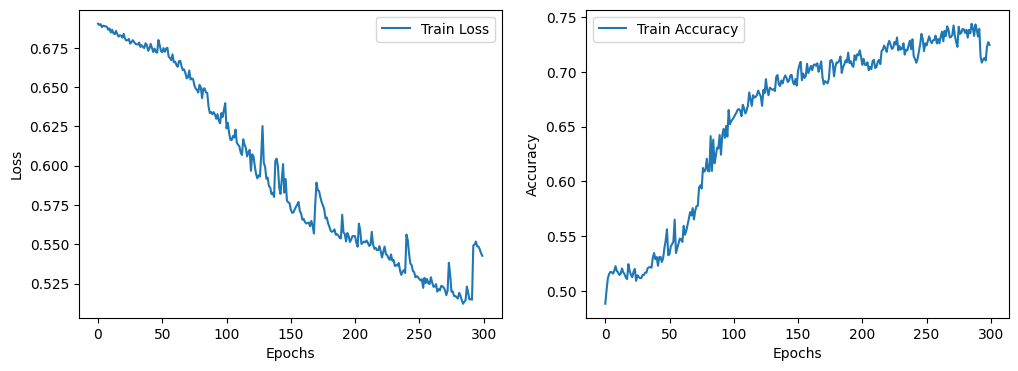

Accuracy: 0.7129
Precision: 0.7286
Recall: 0.7329
F1 Score: 0.7308


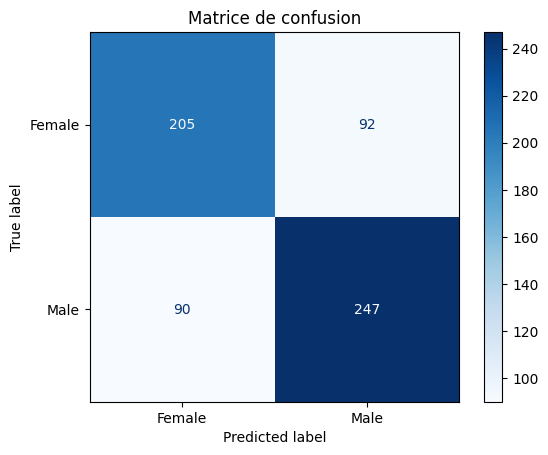

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

file_path = "data/voice.csv"  
data = pd.read_csv(file_path)

data['label'] = data['label'].map({'male': 1, 'female': 0})

X = data.drop(columns=['label']).values  
y = data['label'].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_safe(z):
    return np.clip(sigmoid(z), 1e-7, 1 - 1e-7)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

def binary_cross_entropy_derivative(y_true, y_pred):
    return (y_pred - y_true) / (y_pred * (1 - y_pred) + 1e-8)

def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0) * 0.01
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1) * 0.01
    b2 = np.zeros((n2, 1))
    parameter = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return parameter

def forward_propagation(X, parameter):
    W1 = parameter['W1']
    W2 = parameter['W2']
    b1 = parameter['b1']
    b2 = parameter['b2']
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid_safe(Z2)
    activations = {'A1': A1, 'A2': A2}
    return activations

def back_propragation(X, y, parameter, activations):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parameter['W2']
    m = y.shape[1]
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    gradients = {'db1': db1, 'db2': db2, 'dW1': dW1, 'dW2': dW2}
    return gradients

def update(gradients, parameter, learning_rate):
    dW1 = gradients['dW1']
    dW2 = gradients['dW2']
    db1 = gradients['db1']
    db2 = gradients['db2']
    W1 = parameter['W1']
    W2 = parameter['W2']
    b1 = parameter['b1']
    b2 = parameter['b2']
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    parameter = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
    return parameter

def predict(X, parameter):
    activations = forward_propagation(X, parameter)
    A2 = activations['A2']
    return (A2 >= 0.5).astype(int)

def neural_network(X, y, n1=16, learning_rate=0.1, epochs=50, batch_size=32):
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)
    train_loss = []
    train_acc = []
    
    # Nombre d'exemples
    m = X.shape[1]
    
    for epoch in range(epochs):
        epoch_loss = []
        epoch_acc = []
        
        # Shuffle des données
        permutation = np.random.permutation(m)
        X_shuffled = X[:, permutation]
        y_shuffled = y[:, permutation]
        
        # Mini-batch training
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[:, i:i+batch_size]
            y_batch = y_shuffled[:, i:i+batch_size]
            
            # Forward pass
            activations = forward_propagation(X_batch, parametres)
            A2 = activations['A2']
            
            # Calcul de la perte et des métriques
            loss = log_loss(y_batch.flatten(), A2.flatten())
            y_pred = predict(X_batch, parametres)
            acc = accuracy_score(y_batch.flatten(), y_pred.flatten())
            
            epoch_loss.append(loss)
            epoch_acc.append(acc)
            
            # Backward pass
            gradients = back_propragation(X_batch, y_batch, parametres, activations)
            
            # Mise à jour des paramètres
            parametres = update(gradients, parametres, learning_rate)
        
        # Calcul de la perte et de l'accuracy moyenne pour l'époque
        train_loss.append(np.mean(epoch_loss))
        train_acc.append(np.mean(epoch_acc))
        
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {train_loss[-1]:.4f}, Accuracy: {train_acc[-1]:.4f}")
    
    # Affichage des courbes de perte et d'accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    return parametres

X = X_train.T
y = y_train.reshape((1, y_train.shape[0]))

parametres_final = neural_network(X, y, n1=16, learning_rate=0.01, epochs=300, batch_size=64)

X_test = X_test.T
y_test = y_test.reshape((1, y_test.shape[0]))
y_test = y_test.flatten()

y_test_pred = predict(X_test, parametres_final)  

accuracy = accuracy_score(y_test, y_test_pred.flatten())
precision = precision_score(y_test, y_test_pred.flatten())
recall = recall_score(y_test, y_test_pred.flatten())
f1 = f1_score(y_test, y_test_pred.flatten())

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_test_pred.flatten())

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Female', 'Male'])
cm_display.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Epoch 1/300, Loss: 0.6900, Accuracy: 0.5216
Epoch 2/300, Loss: 0.6852, Accuracy: 0.5240
Epoch 3/300, Loss: 0.6827, Accuracy: 0.5211
Epoch 4/300, Loss: 0.6813, Accuracy: 0.5294
Epoch 5/300, Loss: 0.6785, Accuracy: 0.5433
Epoch 6/300, Loss: 0.6781, Accuracy: 0.5562
Epoch 7/300, Loss: 0.6767, Accuracy: 0.5569
Epoch 8/300, Loss: 0.6744, Accuracy: 0.5857
Epoch 9/300, Loss: 0.6719, Accuracy: 0.5966
Epoch 10/300, Loss: 0.6694, Accuracy: 0.5917
Epoch 11/300, Loss: 0.6675, Accuracy: 0.5905
Epoch 12/300, Loss: 0.6685, Accuracy: 0.5875
Epoch 13/300, Loss: 0.6626, Accuracy: 0.6026
Epoch 14/300, Loss: 0.6654, Accuracy: 0.5935
Epoch 15/300, Loss: 0.6629, Accuracy: 0.6069
Epoch 16/300, Loss: 0.6637, Accuracy: 0.5952
Epoch 17/300, Loss: 0.6598, Accuracy: 0.6205
Epoch 18/300, Loss: 0.6651, Accuracy: 0.5913
Epoch 19/300, Loss: 0.6612, Accuracy: 0.6054
Epoch 20/300, Loss: 0.6602, Accuracy: 0.6201
Epoch 21/300, Loss: 0.6567, Accuracy: 0.6200
Epoch 22/300, Loss: 0.6559, Accuracy: 0.6308
Epoch 23/300, Loss:

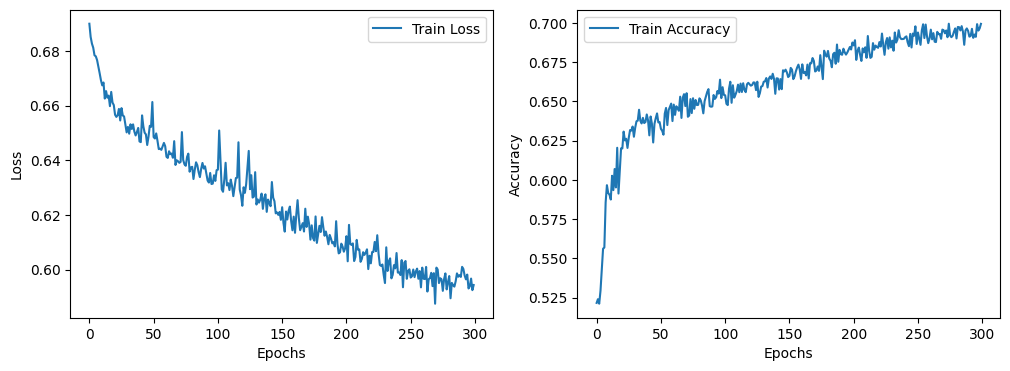

Accuracy: 0.7035
Precision: 0.6997
Recall: 0.7745
F1 Score: 0.7352


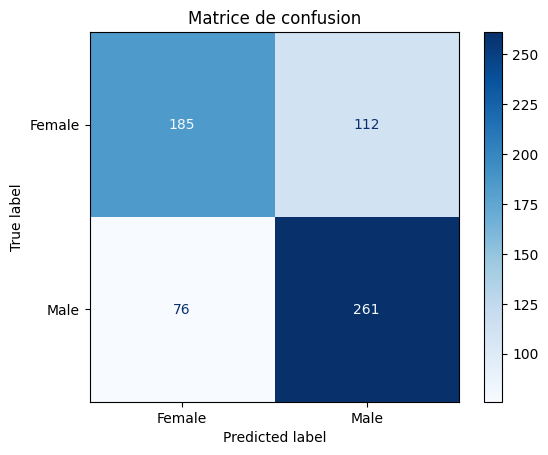

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

file_path = "data/voice.csv"  
data = pd.read_csv(file_path)

data['label'] = data['label'].map({'male': 1, 'female': 0})

X = data.drop(columns=['label']).values  
y = data['label'].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_safe(z):
    return np.clip(sigmoid(z), 1e-7, 1 - 1e-7)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

def binary_cross_entropy_derivative(y_true, y_pred):
    return (y_pred - y_true) / (y_pred * (1 - y_pred) + 1e-8)

def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0) * 0.01
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1) * 0.01
    b2 = np.zeros((n2, 1))
    parameter = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return parameter

def forward_propagation(X, parameter):
    W1 = parameter['W1']
    W2 = parameter['W2']
    b1 = parameter['b1']
    b2 = parameter['b2']
    Z1 = W1.dot(X) + b1
    
    # Normalisation avant ReLU
    mean_Z1 = np.mean(Z1, axis=1, keepdims=True)
    std_Z1 = np.std(Z1, axis=1, keepdims=True)
    Z1_normalized = (Z1 - mean_Z1) / (std_Z1 + 1e-8)  # Ajout d'un epsilon pour éviter la division par zéro
    
    # Application de la fonction d'activation ReLU après normalisation
    A1 = relu(Z1_normalized)
    
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid_safe(Z2)
    
    activations = {'A1': A1, 'A2': A2}
    return activations


def back_propragation(X, y, parameter, activations):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parameter['W2']
    m = y.shape[1]
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    gradients = {'db1': db1, 'db2': db2, 'dW1': dW1, 'dW2': dW2}
    return gradients

def update(gradients, parameter, learning_rate):
    dW1 = gradients['dW1']
    dW2 = gradients['dW2']
    db1 = gradients['db1']
    db2 = gradients['db2']
    W1 = parameter['W1']
    W2 = parameter['W2']
    b1 = parameter['b1']
    b2 = parameter['b2']
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    parameter = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
    return parameter

def predict(X, parameter):
    activations = forward_propagation(X, parameter)
    A2 = activations['A2']
    return (A2 >= 0.5).astype(int)

def neural_network(X, y, n1=16, learning_rate=0.1, epochs=50, batch_size=32):
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)
    train_loss = []
    train_acc = []
    
    # Nombre d'exemples
    m = X.shape[1]
    
    for epoch in range(epochs):
        epoch_loss = []
        epoch_acc = []
        
        # Shuffle des données
        permutation = np.random.permutation(m)
        X_shuffled = X[:, permutation]
        y_shuffled = y[:, permutation]
        
        # Mini-batch training
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[:, i:i+batch_size]
            y_batch = y_shuffled[:, i:i+batch_size]
            
            # Forward pass
            activations = forward_propagation(X_batch, parametres)
            A2 = activations['A2']
            
            # Calcul de la perte et des métriques
            loss = log_loss(y_batch.flatten(), A2.flatten())
            y_pred = predict(X_batch, parametres)
            acc = accuracy_score(y_batch.flatten(), y_pred.flatten())
            
            epoch_loss.append(loss)
            epoch_acc.append(acc)
            
            # Backward pass
            gradients = back_propragation(X_batch, y_batch, parametres, activations)
            
            # Mise à jour des paramètres
            parametres = update(gradients, parametres, learning_rate)
        
        # Calcul de la perte et de l'accuracy moyenne pour l'époque
        train_loss.append(np.mean(epoch_loss))
        train_acc.append(np.mean(epoch_acc))
        
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {train_loss[-1]:.4f}, Accuracy: {train_acc[-1]:.4f}")
    
    # Affichage des courbes de perte et d'accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    return parametres

X = X_train.T
y = y_train.reshape((1, y_train.shape[0]))

parametres_final = neural_network(X, y, n1=16, learning_rate=0.01, epochs=300, batch_size=64)

X_test = X_test.T
y_test = y_test.reshape((1, y_test.shape[0]))
y_test = y_test.flatten()

y_test_pred = predict(X_test, parametres_final)  

accuracy = accuracy_score(y_test, y_test_pred.flatten())
precision = precision_score(y_test, y_test_pred.flatten())
recall = recall_score(y_test, y_test_pred.flatten())
f1 = f1_score(y_test, y_test_pred.flatten())

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_test_pred.flatten())

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Female', 'Male'])
cm_display.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Epoch 1/300, Loss: 0.6921, Accuracy: 0.5142
Epoch 2/300, Loss: 0.6896, Accuracy: 0.5095
Epoch 3/300, Loss: 0.6890, Accuracy: 0.5178
Epoch 4/300, Loss: 0.6889, Accuracy: 0.5179
Epoch 5/300, Loss: 0.6885, Accuracy: 0.5168
Epoch 6/300, Loss: 0.6886, Accuracy: 0.5178
Epoch 7/300, Loss: 0.6893, Accuracy: 0.5185
Epoch 8/300, Loss: 0.6905, Accuracy: 0.5213
Epoch 9/300, Loss: 0.6884, Accuracy: 0.5228
Epoch 10/300, Loss: 0.6892, Accuracy: 0.5243
Epoch 11/300, Loss: 0.6888, Accuracy: 0.5224
Epoch 12/300, Loss: 0.6890, Accuracy: 0.5201
Epoch 13/300, Loss: 0.6894, Accuracy: 0.5202
Epoch 14/300, Loss: 0.6892, Accuracy: 0.5192
Epoch 15/300, Loss: 0.6874, Accuracy: 0.5289
Epoch 16/300, Loss: 0.6875, Accuracy: 0.5246
Epoch 17/300, Loss: 0.6896, Accuracy: 0.5244
Epoch 18/300, Loss: 0.6880, Accuracy: 0.5281
Epoch 19/300, Loss: 0.6877, Accuracy: 0.5219
Epoch 20/300, Loss: 0.6867, Accuracy: 0.5297
Epoch 21/300, Loss: 0.6871, Accuracy: 0.5292
Epoch 22/300, Loss: 0.6878, Accuracy: 0.5277
Epoch 23/300, Loss:

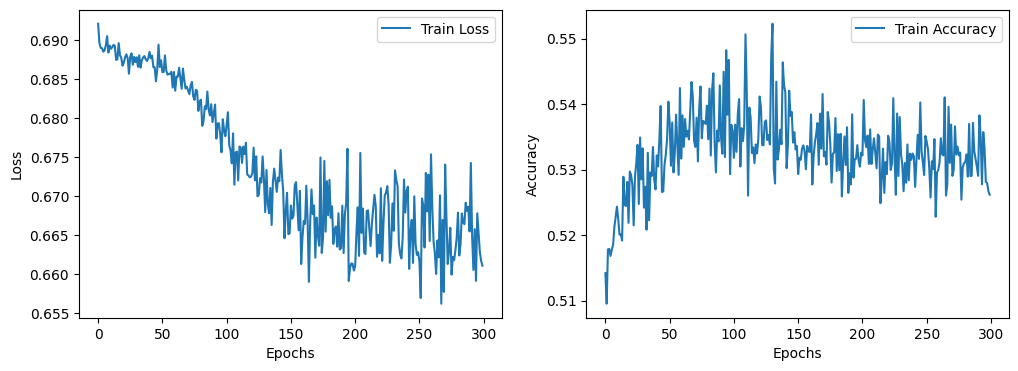

Accuracy: 0.4890
Precision: 0.8421
Recall: 0.0475
F1 Score: 0.0899


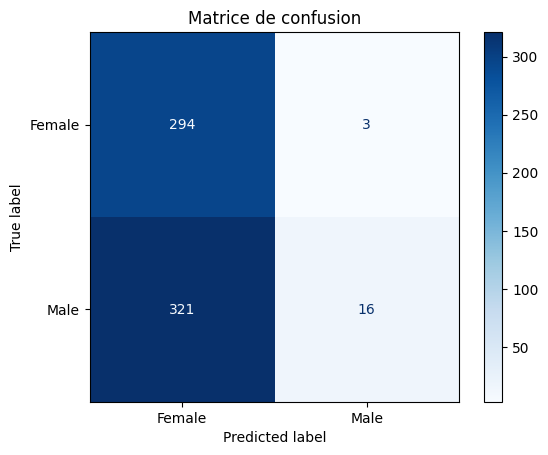

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

file_path = "data/voice.csv"  
data = pd.read_csv(file_path)

data['label'] = data['label'].map({'male': 1, 'female': 0})

X = data.drop(columns=['label']).values  
y = data['label'].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_safe(z):
    return np.clip(sigmoid(z), 1e-7, 1 - 1e-7)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

def binary_cross_entropy_derivative(y_true, y_pred):
    return (y_pred - y_true) / (y_pred * (1 - y_pred) + 1e-8)

def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0) * 0.01
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1) * 0.01
    b2 = np.zeros((n2, 1))
    parameter = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return parameter

def batch_normalization(Z, gamma, beta, epsilon=1e-8):
    mean = np.mean(Z, axis=1, keepdims=True)
    variance = np.var(Z, axis=1, keepdims=True)
    
    # Normalisation
    Z_norm = (Z - mean) / np.sqrt(variance + epsilon)
    
    # Transformation linéaire
    Z_out = gamma * Z_norm + beta
    
    return Z_out, mean, variance, Z_norm

def forward_propagation(X, parameter, gamma1, beta1):
    W1 = parameter['W1']
    W2 = parameter['W2']
    b1 = parameter['b1']
    b2 = parameter['b2']
    Z1 = W1.dot(X) + b1
    
    # Batch Normalization sur la couche cachée
    Z1_bn, mean_Z1, var_Z1, Z1_norm = batch_normalization(Z1, gamma1, beta1)
    
    # Application de la fonction d'activation ReLU après Batch Normalization
    A1 = relu(Z1_bn)
    
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid_safe(Z2)
    
    activations = {'A1': A1, 'A2': A2}
    cache = {'mean_Z1': mean_Z1, 'var_Z1': var_Z1, 'Z1_norm': Z1_norm}
    
    return activations, cache

def back_propagation(X, y, parameter, activations, cache, gamma1, beta1):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parameter['W2']
    m = y.shape[1]
    
    # Rétropropagation de la couche de sortie (couche 2)
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    
    # Rétropropagation de la couche cachée (couche 1) avec Batch Normalization
    dA1 = W2.T.dot(dZ2)
    dZ1_bn = dA1 * relu_derivative(A1)
    
    # Rétropropagation de la normalisation
    Z1_norm = cache['Z1_norm']
    mean_Z1 = cache['mean_Z1']
    var_Z1 = cache['var_Z1']
    
    m = Z1_norm.shape[1]
    
    # Calcul des gradients de la normalisation
    dZ1 = (1. / m) * gamma1 * (1. / np.sqrt(var_Z1 + 1e-8)) * (
        m * dZ1_bn - np.sum(dZ1_bn, axis=1, keepdims=True) - Z1_norm * np.sum(dZ1_bn * Z1_norm, axis=1, keepdims=True) / (var_Z1 + 1e-8)
    )
    
    # Gradients pour les poids et biais
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    # Gradients pour gamma et beta
    dgamma1 = np.sum(dZ1_bn * Z1_norm, axis=1, keepdims=True)
    dbeta1 = np.sum(dZ1_bn, axis=1, keepdims=True)
    
    gradients = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2, 'dgamma1': dgamma1, 'dbeta1': dbeta1}
    
    return gradients

def update(gradients, parameter, gamma1, beta1, learning_rate):
    dW1 = gradients['dW1']
    dW2 = gradients['dW2']
    db1 = gradients['db1']
    db2 = gradients['db2']
    W1 = parameter['W1']
    W2 = parameter['W2']
    b1 = parameter['b1']
    b2 = parameter['b2']
    
    # Mise à jour des paramètres du réseau
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    # Mise à jour des paramètres de Batch Normalization
    gamma1 = gamma1 - learning_rate * gradients['dgamma1']
    beta1 = beta1 - learning_rate * gradients['dbeta1']
    
    parameter = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
    
    return parameter, gamma1, beta1

def predict(X, parameter):
    activations, _ = forward_propagation(X, parameter, gamma1, beta1)
    A2 = activations['A2']
    return (A2 >= 0.5).astype(int)

def neural_network(X, y, n1=16, learning_rate=0.1, epochs=50, batch_size=32):
    n0 = X.shape[0]
    n2 = y.shape[0]
    
    # Initialisation des paramètres du réseau
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)
    
    # Initialisation des paramètres de Batch Normalization
    gamma1 = np.ones((n1, 1))
    beta1 = np.zeros((n1, 1))
    
    train_loss = []
    train_acc = []
    
    # Nombre d'exemples
    m = X.shape[1]
    
    for epoch in range(epochs):
        epoch_loss = []
        epoch_acc = []
        
        # Shuffle des données
        permutation = np.random.permutation(m)
        X_shuffled = X[:, permutation]
        y_shuffled = y[:, permutation]
        
        # Mini-batch training
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[:, i:i+batch_size]
            y_batch = y_shuffled[:, i:i+batch_size]
            
            # Forward pass
            activations, cache = forward_propagation(X_batch, parametres, gamma1, beta1)
            A2 = activations['A2']
            
            # Calcul de la perte et des métriques
            loss = log_loss(y_batch.flatten(), A2.flatten())
            y_pred = predict(X_batch, parametres)
            acc = accuracy_score(y_batch.flatten(), y_pred.flatten())
            
            epoch_loss.append(loss)
            epoch_acc.append(acc)
            
            # Backward pass
            gradients = back_propagation(X_batch, y_batch, parametres, activations, cache, gamma1, beta1)
            
            # Mise à jour des paramètres
            parametres, gamma1, beta1 = update(gradients, parametres, gamma1, beta1, learning_rate)
        
        # Calcul de la perte et de l'accuracy moyenne pour l'époque
        train_loss.append(np.mean(epoch_loss))
        train_acc.append(np.mean(epoch_acc))
        
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {train_loss[-1]:.4f}, Accuracy: {train_acc[-1]:.4f}")
    
    # Affichage des courbes de perte et d'accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    return parametres

X = X_train.T
y = y_train.reshape((1, y_train.shape[0]))

# Initialisation des paramètres pour Batch Normalization
gamma1 = np.ones((16, 1))
beta1 = np.zeros((16, 1))

parametres_final = neural_network(X, y, n1=16, learning_rate=0.01, epochs=300, batch_size=64)

X_test = X_test.T
y_test = y_test.reshape((1, y_test.shape[0]))
y_test = y_test.flatten()

y_test_pred = predict(X_test, parametres_final)  

accuracy = accuracy_score(y_test, y_test_pred.flatten())
precision = precision_score(y_test, y_test_pred.flatten())
recall = recall_score(y_test, y_test_pred.flatten())
f1 = f1_score(y_test, y_test_pred.flatten())

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_test_pred.flatten())

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Female', 'Male'])
cm_display.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()
